# Importing Libraries

In [1]:
import numpy as np  
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split 

# For Conversion of numerical columns to categorical columns. 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model Building 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error


# Reading data

In [54]:
path='D:\\Courses\\Project Machine Learning\\diabetes_prediction_dataset.csv'
data=pd.read_csv(path)
print('The Data Contains %d Rows And %d Columns'%(data.shape))

The Data Contains 100000 Rows And 9 Columns


In [55]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Pre-processing The data

In [56]:
## First check null entries
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [57]:
# Now, check for duplicate rows
data.drop_duplicates(inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [60]:
data['diabetes'].value_counts()
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [7]:
LE=LabelEncoder()
data['gender'] = LE.fit_transform(data['gender'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [8]:
data['gender'].value_counts()

0    56161
1    39967
2       18
Name: gender, dtype: int64

In [53]:
data['smoking_history'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96112 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96112 non-null  int32  
 1   age                  96112 non-null  int32  
 2   hypertension         96112 non-null  int64  
 3   heart_disease        96112 non-null  int64  
 4   smoking_history      96112 non-null  int32  
 5   bmi                  96112 non-null  float64
 6   HbA1c_level          96112 non-null  float64
 7   blood_glucose_level  96112 non-null  int64  
 8   diabetes             96112 non-null  int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 6.2 MB


In [10]:
## Do Label Encoding for smoking_history column
LE=LabelEncoder()
data['smoking_history'] = LE.fit_transform(data['smoking_history'])
#print(data['smoking_history'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [11]:
data['smoking_history'].value_counts()

4    34398
0    32887
3     9299
1     9197
5     6367
2     3998
Name: smoking_history, dtype: int64

In [12]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,2.231159,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.879963,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,4.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


# Do analysis for age column
because, above cell shows min value for age is 0.08, that is not possible 

<AxesSubplot:>

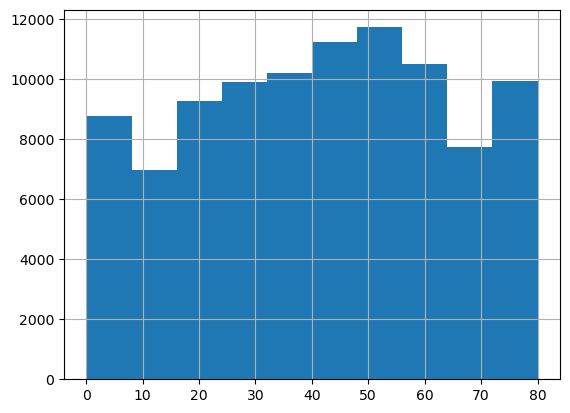

In [13]:
data['age'].hist()

In [14]:
## convert age column datatype to int
data['age'] = data['age'].astype(int)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  int32  
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int32  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 6.2 MB


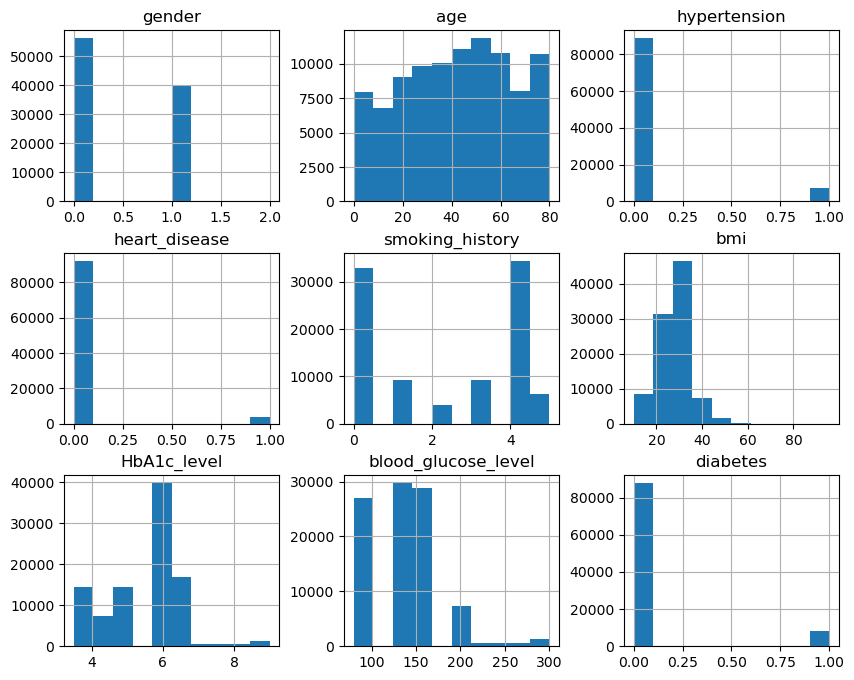

In [16]:
#bins == number of bars 
data.hist(bins=10, figsize=(10,8))
plt.show()

# Spliting the dataset into training and testing


In [17]:
#split and converted to mtrix
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [18]:
print(X)

[[  0.    80.     0.   ...  25.19   6.6  140.  ]
 [  0.    54.     0.   ...  27.32   6.6   80.  ]
 [  1.    28.     0.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     0.   ...  27.83   5.7  155.  ]
 [  0.    24.     0.   ...  35.42   4.   100.  ]
 [  0.    57.     0.   ...  22.43   6.6   90.  ]]


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=44)
print(f"x train shape : {X_train.shape}")
print(f"y train shape : {y_train.shape}")
print(f"x test shape : {X_test.shape}")
print(f"y test shape : {y_test.shape}")

x train shape : (76916, 8)
y train shape : (76916,)
x test shape : (19230, 8)
y test shape : (19230,)


# Scalling the data

In [20]:
stand = StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [21]:
X_train

array([[-0.8421897 ,  1.69990135,  3.44540514, ..., -0.2106008 ,
         3.0454714 ,  3.46992061],
       [ 1.18547685,  0.18655083, -0.29024163, ...,  0.70048011,
         0.5283368 ,  0.50958359],
       [ 1.18547685, -1.77190278, -0.29024163, ..., -1.45726563,
        -0.96329852, -0.29778105],
       ...,
       [-0.8421897 ,  1.07675702, -0.29024163, ...,  0.44584845,
         0.5283368 ,  0.04473728],
       [-0.8421897 ,  1.61088073,  3.44540514, ...,  0.38108664,
        -0.96329852, -0.19991867],
       [ 1.18547685, -1.8609234 , -0.29024163, ..., -1.82228674,
         0.15542797,  0.04473728]])

In [22]:
X_test

array([[ 1.18547685e+00, -8.05110226e-02, -2.90241629e-01, ...,
         3.19268550e-01,  4.35109592e-01, -1.42319844e+00],
       [-8.42189704e-01,  6.76164237e-01, -2.90241629e-01, ...,
        -9.92158091e-01,  9.94472837e-01,  1.67065256e-01],
       [-8.42189704e-01,  1.69990135e+00, -2.90241629e-01, ...,
         6.23943426e-01, -6.83616898e-01,  4.11721208e-01],
       ...,
       [-8.42189704e-01, -7.48165664e-01, -2.90241629e-01, ...,
        -1.59677867e-03,  4.35109592e-01,  4.11721208e-01],
       [ 1.18547685e+00, -7.92675973e-01, -2.90241629e-01, ...,
        -3.68089745e-01, -6.83616898e-01,  1.51267299e+00],
       [-8.42189704e-01, -8.05110226e-02,  3.44540514e+00, ...,
         9.28618302e-01, -1.42943456e+00,  4.47372793e-02]])

# Training the model using Logistic Regression


In [38]:
#Training
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [39]:
#testing
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [40]:
#Calculate the error
MSE=mean_squared_error(y_pred,y_test)
print(f'The Mean Squared Error is {MSE.round(4)}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confuision Matrix is \n {cm}')
print(f'Accuracy for Logistic Regression Model {accuracy_score(y_test, y_pred).round(4)*100} %')

The Mean Squared Error is 0.0385
Confuision Matrix is 
 [[17389   148]
 [  593  1100]]
Accuracy for Logistic Regression Model 96.15 %


# Training the model using KNeighborsClassifier

In [41]:
#Trainig
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = knc.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [43]:
MSE=mean_squared_error(y_pred,y_test)
print(f'The Mean Squared Error is {MSE.round(4)}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confuision Matrix is \n {cm}')
print(f'Accuracy for K-Neighbors Classifier Model {accuracy_score(y_test, y_pred).round(4)*100} %')

The Mean Squared Error is 0.0394
Confuision Matrix is 
 [[17405   132]
 [  625  1068]]
Accuracy for K-Neighbors Classifier Model 96.06 %


# Training the model using Naive Bayes


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = gnb.predict(X_test)

In [46]:
MSE=mean_squared_error(y_pred,y_test)
print(f'The Mean Squared Error is {MSE.round(4)}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix is \n {cm}')
print(f'Accuracy for using Naive Bayes Model {accuracy_score(y_test, y_pred).round(4)*100} %')

The Mean Squared Error is 0.0968
Confusion Matrix is 
 [[16254  1283]
 [  578  1115]]
Accuracy for using Naive Bayes Model 90.32 %


# Training the model using Random Forest Classifier


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
#criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [48]:
y_pred = rfc.predict(X_test)

In [49]:
cm = confusion_matrix(y_test, y_pred)
MSE=mean_squared_error(y_pred,y_test)
print(f'The Mean Squared Error is {MSE.round(4)}')
print(f'Confusion Matrix is \n {cm}')
print(f'Accuracy for using Random Forest Classifier Model {accuracy_score(y_test, y_pred).round(4)*100} %')

The Mean Squared Error is 0.0306
Confusion Matrix is 
 [[17445    92]
 [  496  1197]]
Accuracy for using Random Forest Classifier Model 96.94 %


# Show accuracy for all models

In [50]:
df = pd.DataFrame({
    'Model Name': ['Logistic Regression', 'K Neighbors Classifier',  'Naive Bayes','Random Forest Classifier'],
    'Accuracy Score':[96.14                   ,96.06                        ,90.32,      97.00        ]
})
df

,Model Name,Accuracy Score
0,Logistic Regression,96.14
1,K Neighbors Classifier,96.06
2,Naive Bayes,90.32
3,Random Forest Classifier,97.00
